# Project 2 - Ames Housing Data and Kaggle Challenge

In [2]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Problem Statement

Presently, one of my relatives is gaining interested in a real estate trading business. What she's currently doing is searching for second-hand houses/condominiums that worth renovating for resale. One of the problems she has is the valuation of the property since it is very subjective, and there are plenty of factors affecting its price. 

Therefore, this project aims to study significant factors affecting the property value (which add the most value to a property and which hurt the price most?) and finally build a model that accurately predicts the property price in a timely manner. So we do not miss an opportunity to get undervalued properties and maximize our profit!

**List of model used in the project**
1. Multiple Linear Regression
1. Regularized Linear Regression in multiple variance
    - Ridge Regression
    - Lasso Regression
    - ElasticNet Regression
    
**Evaluation metrics:**
- For this occasion, RMSE (Square root of Mean Squared Error) will be used as an evaluation metrics

**Baseline performance:**
- The perfermance of our model will be compared against the baseline model that make an average of property price as a prediction in every time.

## Dataset Overview

> The <a href = http://www.amstat.org/publications/jse/v19n3/decock.pdf > Ames Housing dataset </a> was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.

The dataset contains 2051 observation of 80 features, describing specific characteristics of residential property in Ames, Iowa  sold between 2006 - 2010. Of the 80 features, it can be separated into 4 main categories as follow

1. Features of the house --> a string describing main features such as roof material, mansory type, electrical system
1. Area-Size related --> 1st floor and 2nd floor area, lot area, pool area, garage area
1. Location of the house, neighborhood...
1. Surrounding Environmental Factor --> alley, landslope


<a href = http://localhost:8889/edit/Project1234/project_2/data_dict.md > See full data dictionary here </a>

In [3]:
house = pd.read_csv('../datasets/train.csv')
house.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### Summary Statistics

The residential property in the training set were built between 1872 to 2010. 

- Overall quality is widely distributed with some are qualified as very poor (1) while some are in the perfect condition (10) with median in moderate condition (6)
- Type of property on sale might range from small houses/condominium to elegant penthouses, since the lot area were wildly distributed
- More than half of them were single storey buidling (no 2nd floor)
- Most of them were not built with a pool

In [5]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


## Data Cleaning

### Dealing with Missing Values

Text(0.5, 1.02, 'Most missing values by attributes')

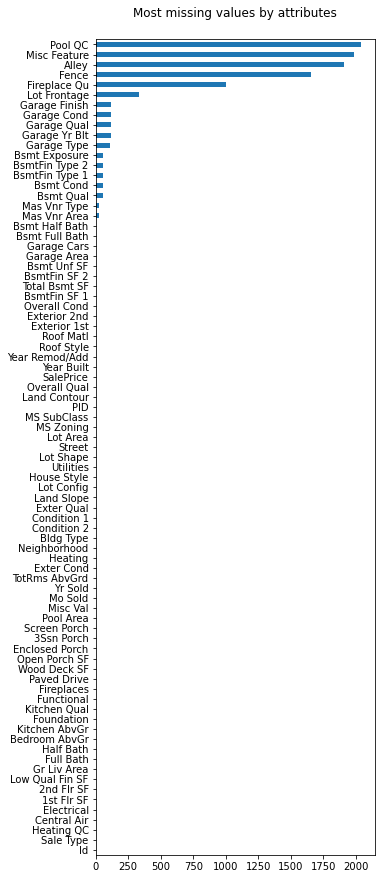

In [6]:
plt.figure(figsize=(5, 15))
house.isnull().sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Most missing values by attributes', y=1.02)

I'll drop out top 5 columns that contain mostly missing values
1. Pool QC
1. Misc Feature
1. Alley
1. Fence
1. Fireplace Qu

In [7]:
house = house.drop(
    columns=['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'])

In [8]:
house.isnull().sum().sort_values(ascending=False)[:30]

Lot Frontage      330
Garage Yr Blt     114
Garage Finish     114
Garage Qual       114
Garage Cond       114
Garage Type       113
Bsmt Exposure      58
BsmtFin Type 2     56
Bsmt Cond          55
Bsmt Qual          55
BsmtFin Type 1     55
Mas Vnr Area       22
Mas Vnr Type       22
Bsmt Half Bath      2
Bsmt Full Bath      2
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Garage Area         1
Garage Cars         1
Total Bsmt SF       1
Full Bath           0
Gr Liv Area         0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Fireplaces          0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
dtype: int64

There are still some significant missing columns, let's deal with them one by one.

#### Lot frontage

In [9]:
# Searching for highly correlated features with frontage
np.abs(house.corr()['Lot Frontage']).sort_values(ascending=False)[:5]

Lot Frontage    1.000000
Lot Area        0.574024
1st Flr SF      0.463900
MS SubClass     0.389790
Gr Liv Area     0.383856
Name: Lot Frontage, dtype: float64

In [10]:
# Impute frontage function
def impute_frontage(df):
    """
    input : orignial dataframe
    output : dataframe with imputed Lot Frontage
    ---
    trying to impute missing lot frontage with simple linear regression which take '1st Flr SF' and 'Lot Area' as inputs
    """
    from sklearn.linear_model import LinearRegression
    X_lot = house[house['Lot Frontage'] > 0][['1st Flr SF', 'Lot Area']]
    y_lot = house[house['Lot Frontage'] > 0]['Lot Frontage']
    lot_model = LinearRegression()
    lot_model.fit(X_lot, y_lot)

    lot_frontage_imputed = []
    for i in range(len(df)):
        if df.loc[i, 'Lot Frontage'] > 0:
            lot_frontage_imputed.append(df.loc[i, 'Lot Frontage'])
        else:
            lot_frontage_imputed.append(
                lot_model.predict([df.loc[i, ['1st Flr SF', 'Lot Area']]])[0])

    df['lot_frontage_imputed'] = lot_frontage_imputed
    return df

In [11]:
house = impute_frontage(house)
house = house.drop(columns=['Lot Frontage'])

/Users/wirachlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/wirachlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/wirachlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Pleas

/Users/wirachlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/wirachlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/wirachlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Pleas

#### Garage and Basement

- From the data dictionary, house Garage Type will contain NaN if there is no garage.
- The same rule also applied to Basement parameters

In [12]:
house.isnull().sum().sort_values(ascending=False)[:10]

Garage Yr Blt     114
Garage Finish     114
Garage Qual       114
Garage Cond       114
Garage Type       113
Bsmt Exposure      58
BsmtFin Type 2     56
Bsmt Cond          55
BsmtFin Type 1     55
Bsmt Qual          55
dtype: int64

In [13]:
# Garage Imputation

house['Garage Yr Blt'] = house['Garage Yr Blt'].map(lambda x: x
                                                    if x > 0 else 0)
house['Garage Finish'] = house['Garage Finish'].map(lambda x: x 
                                                    if type(x) == str else 'NA')
house['Garage Qual'] = house['Garage Qual'].map(lambda x: x
                                                if type(x) == str else 'NA')
house['Garage Cond'] = house['Garage Cond'].map(lambda x: x
                                                if type(x) == str else 'NA')
house['Garage Type'] = house['Garage Type'].map(lambda x: x
                                                if type(x) == str else 'NA')

# Basement imputation
house['Bsmt Exposure'] = house['Bsmt Exposure'].map(
    lambda x: x if type(x) == str else 'NA')

house['BsmtFin Type 1'] = house['BsmtFin Type 1'].map(
    lambda x: x if type(x) == str else 'NA')

house['BsmtFin Type 2'] = house['BsmtFin Type 2'].map(
    lambda x: x if type(x) == str else 'NA')

house['Bsmt Cond'] = house['Bsmt Cond'].map(
    lambda x: x if type(x) == str else 'NA')

house['Bsmt Qual'] = house['Bsmt Qual'].map(
    lambda x: x if type(x) == str else 'NA')

#### Mansory type and area

In [14]:
house['Mas Vnr Type'] = house['Mas Vnr Type'].map(
    lambda x: x if type(x) == str else 'None')
house['Mas Vnr Area'] = house['Mas Vnr Area'].map(lambda x: x if x > 0 else 0)

In [15]:
house.isnull().sum().sort_values(ascending=False)[:10]

Bsmt Full Bath    2
Bsmt Half Bath    2
Total Bsmt SF     1
Bsmt Unf SF       1
BsmtFin SF 2      1
BsmtFin SF 1      1
Garage Cars       1
Garage Area       1
Half Bath         0
TotRms AbvGrd     0
dtype: int64

#### Otherwise, drop all NA

In [16]:
house = house.dropna()

### Chain Data Cleaning steps together

In [17]:
def cleaning_data(df):

    # 1. Drop most missing columns
    df = df.drop(
        columns=['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'])

    # 2. Impute lot frontage
    from sklearn.linear_model import LinearRegression
    X_lot = df[df['Lot Frontage'] > 0][['1st Flr SF', 'Lot Area']]
    y_lot = df[df['Lot Frontage'] > 0]['Lot Frontage']
    lot_model = LinearRegression()
    lot_model.fit(X_lot, y_lot)

    lot_frontage_imputed = []
    for i in range(len(df)):
        if df.loc[i, 'Lot Frontage'] > 0:
            lot_frontage_imputed.append(df.loc[i, 'Lot Frontage'])
        else:
            lot_frontage_imputed.append(
                lot_model.predict([df.loc[i, ['1st Flr SF', 'Lot Area']]])[0])

    df['lot_frontage_imputed'] = lot_frontage_imputed
    df = df.drop(columns=['Lot Frontage'])

    # Garage Imputation

    df['Garage Yr Blt'] = df['Garage Yr Blt'].map(lambda x: x if x > 0 else 0)
    df['Garage Finish'] = df['Garage Finish'].map(lambda x: x
                                                  if type(x) == str else 'NA')
    df['Garage Qual'] = df['Garage Qual'].map(lambda x: x
                                              if type(x) == str else 'NA')
    df['Garage Cond'] = df['Garage Cond'].map(lambda x: x
                                              if type(x) == str else 'NA')
    df['Garage Type'] = df['Garage Type'].map(lambda x: x
                                              if type(x) == str else 'NA')

    # Basement imputation
    df['Bsmt Exposure'] = df['Bsmt Exposure'].map(lambda x: x
                                                  if type(x) == str else 'NA')
    df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map(
        lambda x: x if type(x) == str else 'NA')
    df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map(
        lambda x: x if type(x) == str else 'NA')
    df['Bsmt Cond'] = df['Bsmt Cond'].map(lambda x: x
                                          if type(x) == str else 'NA')
    df['Bsmt Qual'] = df['Bsmt Qual'].map(lambda x: x
                                          if type(x) == str else 'NA')

    # Mansory type and area
    df['Mas Vnr Type'] = df['Mas Vnr Type'].map(lambda x: x
                                                if type(x) == str else 'None')
    df['Mas Vnr Area'] = df['Mas Vnr Area'].map(lambda x: x if x > 0 else 0)

    # Electrical Imputation
    df['Electrical'] = df['Electrical'].map(
        lambda x: x if type(x) == str else df['Electrical'].mode())
    # Drop other observation containing Null
    df = df.dropna()

    return df

In [18]:
train = pd.read_csv('../datasets/train.csv')
train = cleaning_data(train)

/Users/wirachlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/wirachlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/wirachlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Pleas

/Users/wirachlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/wirachlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/wirachlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Pleas

/Users/wirachlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/wirachlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/Users/wirachlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Pleas

## Exploratory Data Analysis

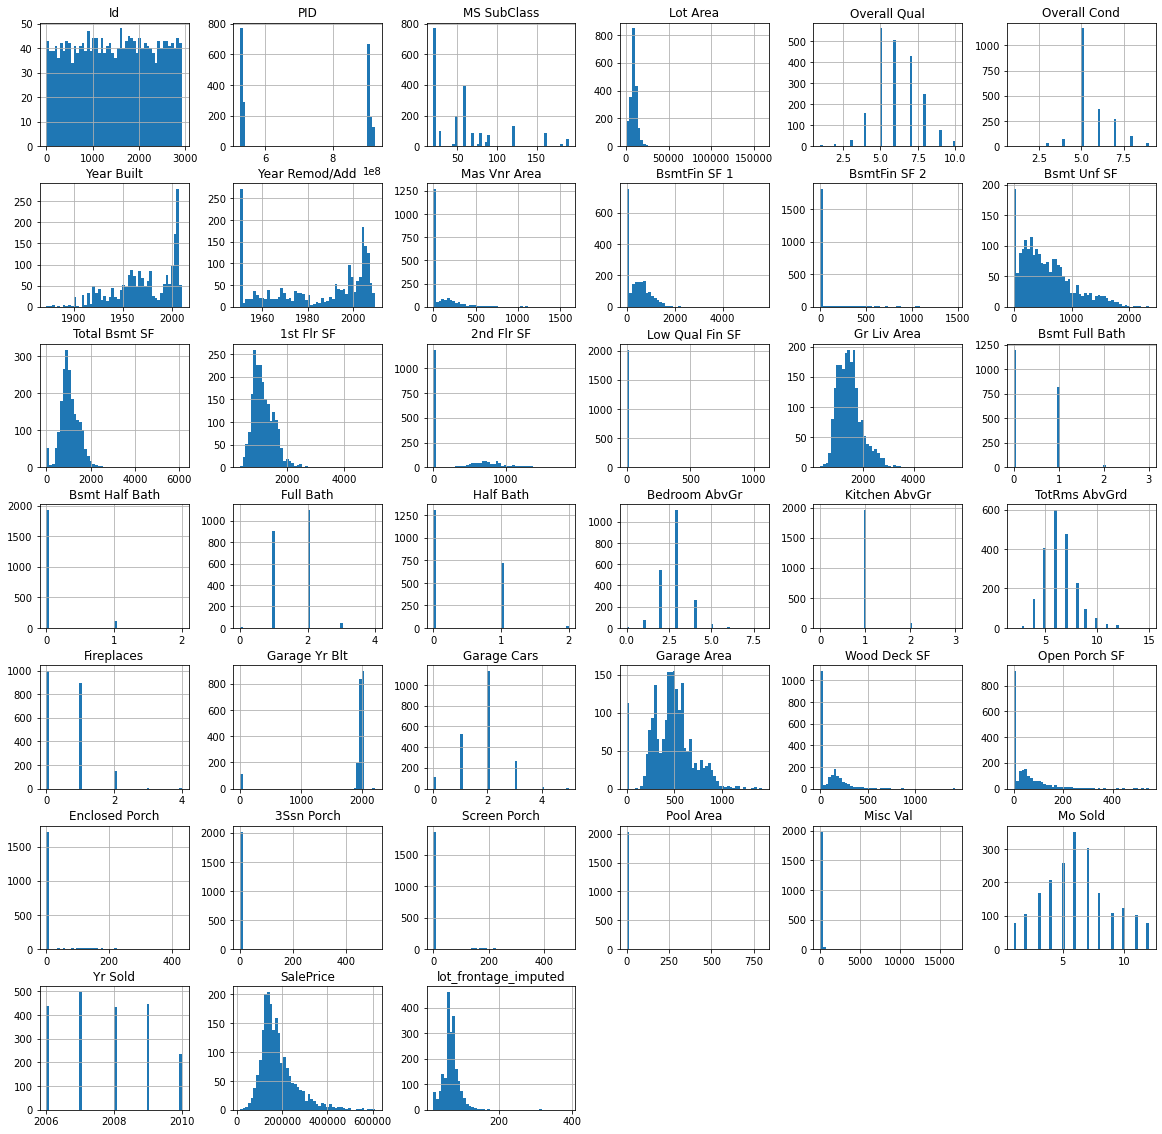

In [19]:
train.hist(figsize=(20, 20), bins=50);

### Distribution of target variable

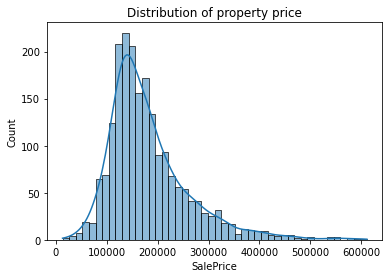

In [20]:
g = sns.histplot(train['SalePrice'],kde=True)
g.set_title('Distribution of property price');

In [21]:
train['SalePrice'].quantile(0.975)

392000.0

**SalePrice (target variable)** distribution is right-skewed. Some outliers might affect our model's performance. However, we'll deal with this later on if the model doesn't perform as good as we expect.

### Pearson Correlation Matrix

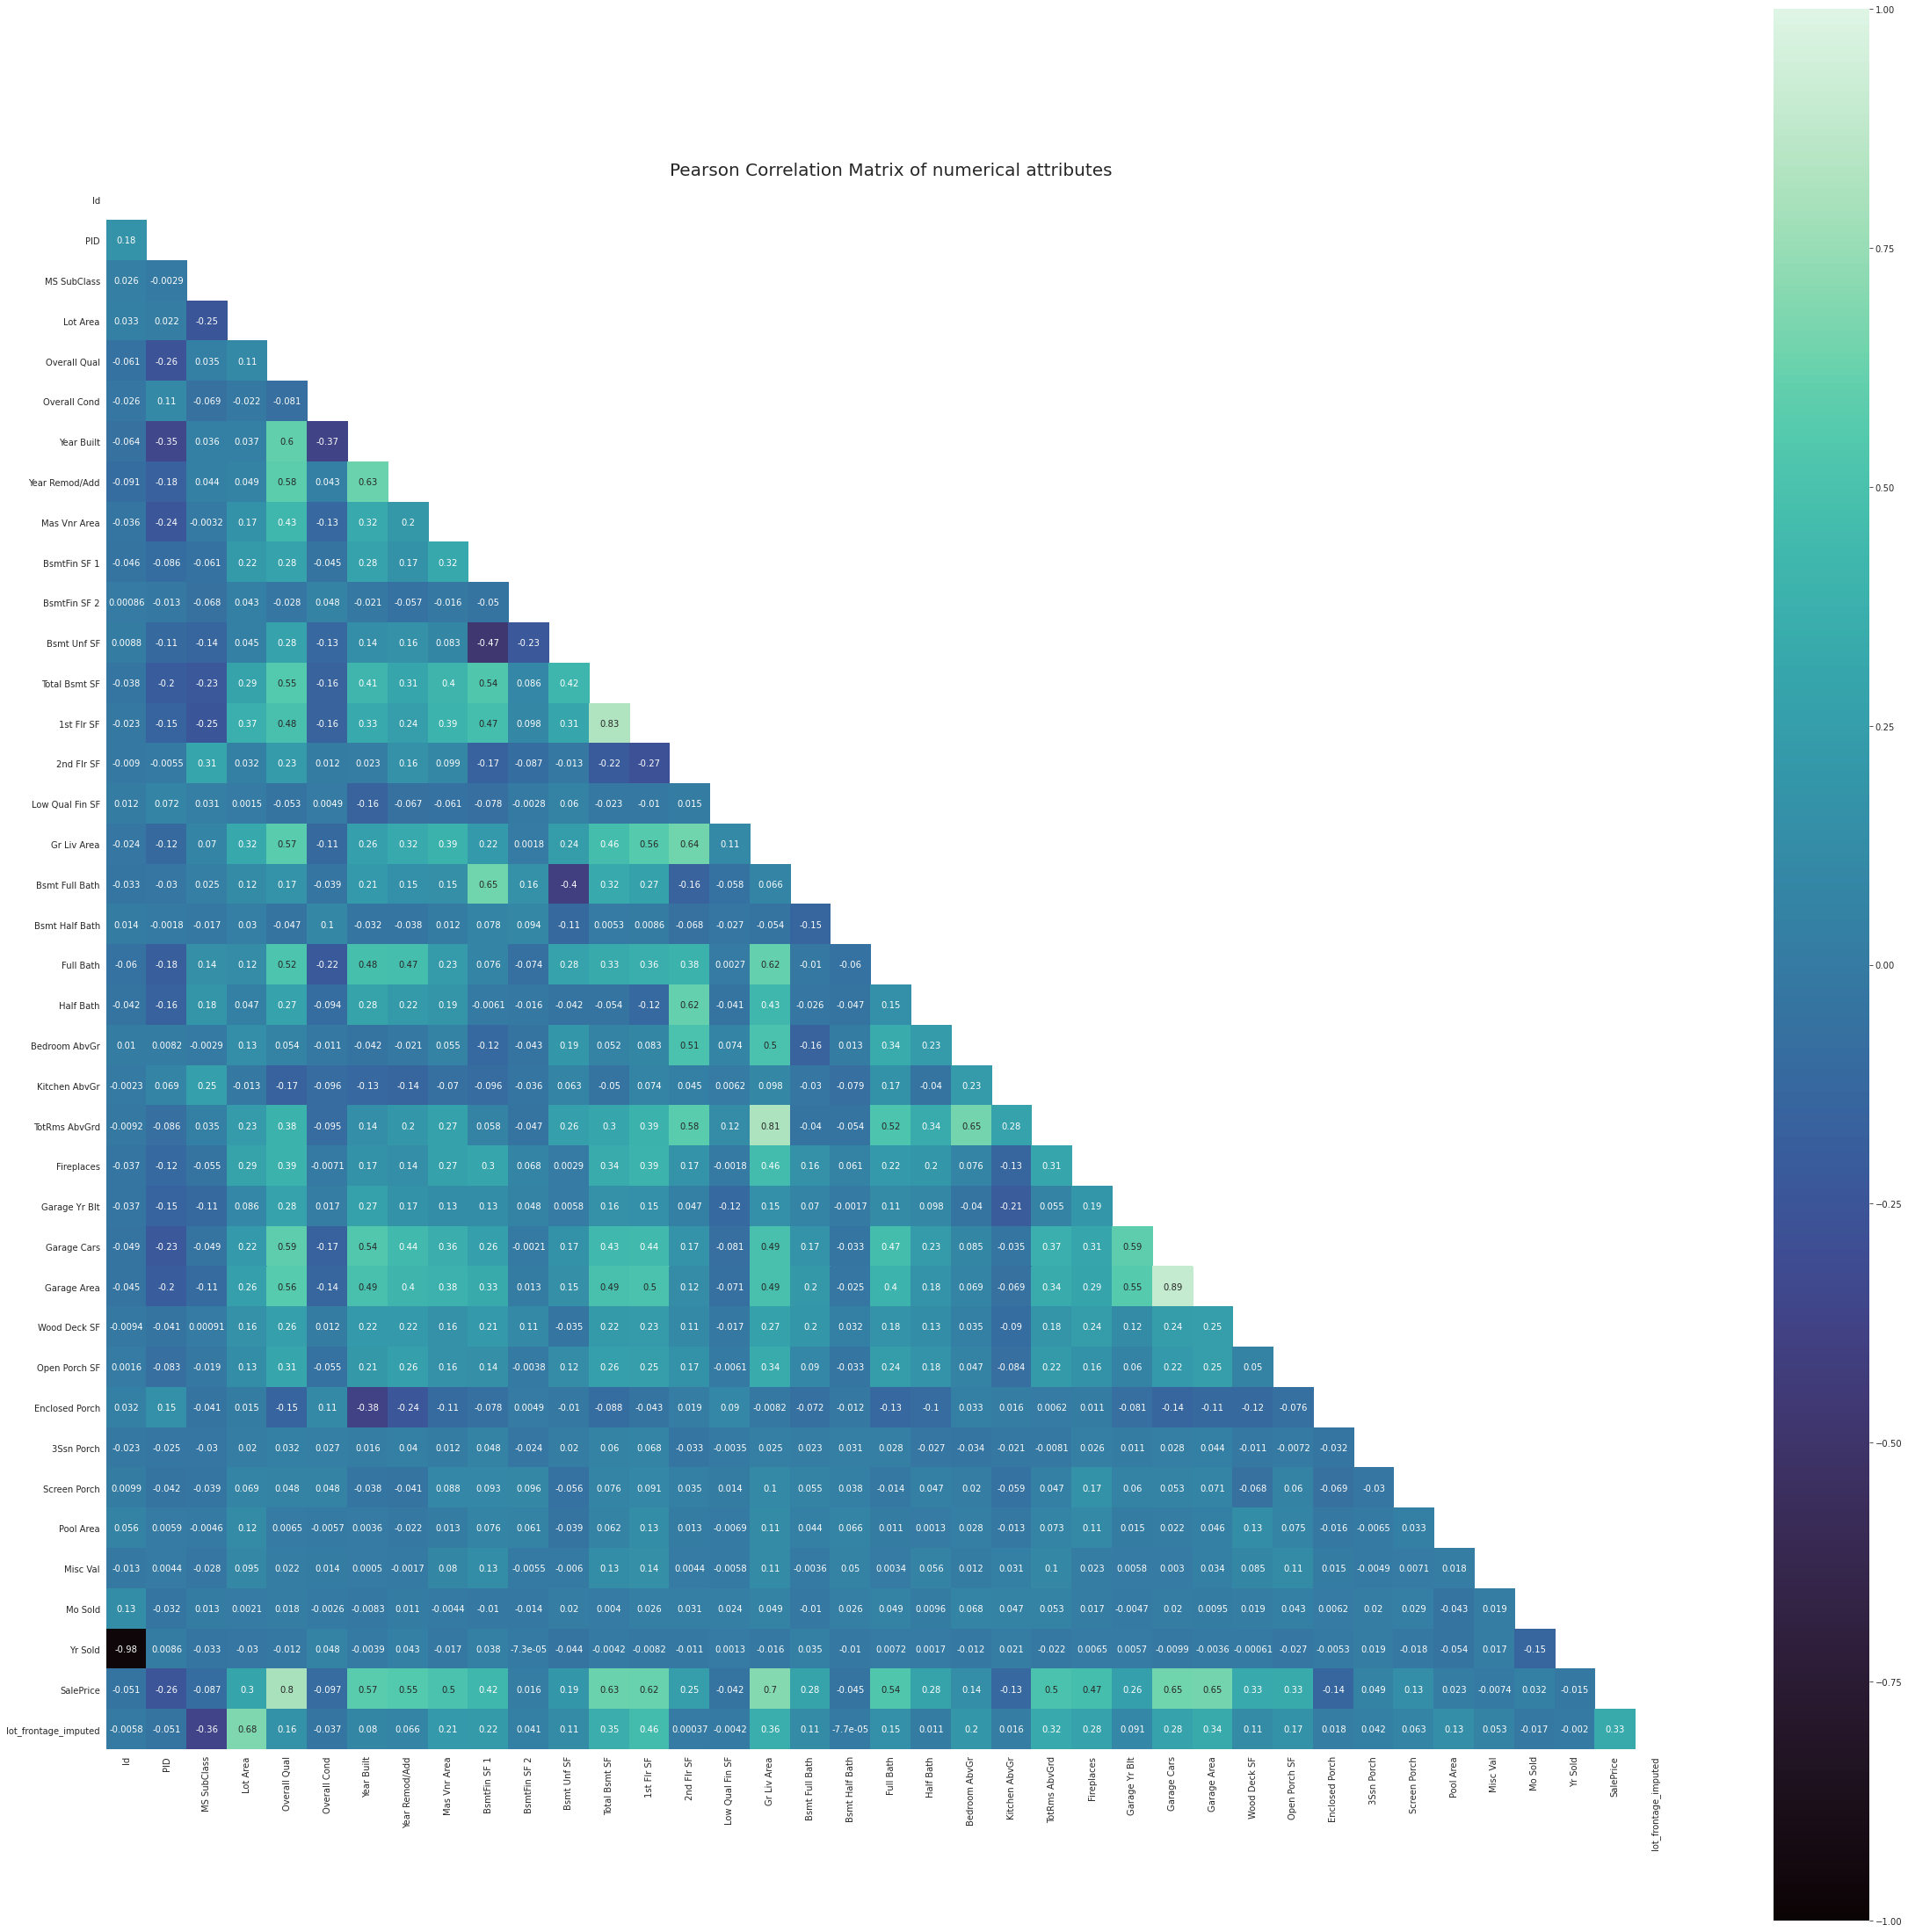

In [22]:
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(40, 40))
    ax = sns.heatmap(corr,
                     mask=mask,
                     vmax=1,
                     vmin=-1,
                     square=True,
                     cmap='mako',
                     annot=True)
    
    ax.set_title("Pearson Correlation Matrix of numerical attributes",size=20)

From the correlation matrix, there is evidence of multicollinearity by just simply take a look at bright and dark spots sporadically distributed in the matrix.

In [23]:
# get rid of highly correlated features

correlated_features = set()
correlation_matrix = train.drop('SalePrice', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7: #select highly correlated features from correlation matrix
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features.remove('Yr Sold') #keep Yr Sold feature, since I have a plan to engineer new feature based on this factor
correlated_features.remove('1st Flr SF') #keep 1st Flr SF feature, since I have a plan to engineer new feature based on this factor
train = train.drop(columns=correlated_features) 

In [24]:
# numerical columns
num_col = np.abs(train.corr()['SalePrice'])
num_col.drop('SalePrice', inplace=True)
num_col = num_col[num_col > 0.3] #Select only feature with correlation coefficient > 0.3
num_col = num_col.index.to_list()

In [25]:
# categorical columns
cat_col = house.loc[:, house.dtypes == object].columns

In [26]:
cat_col

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type'],
      dtype='object')

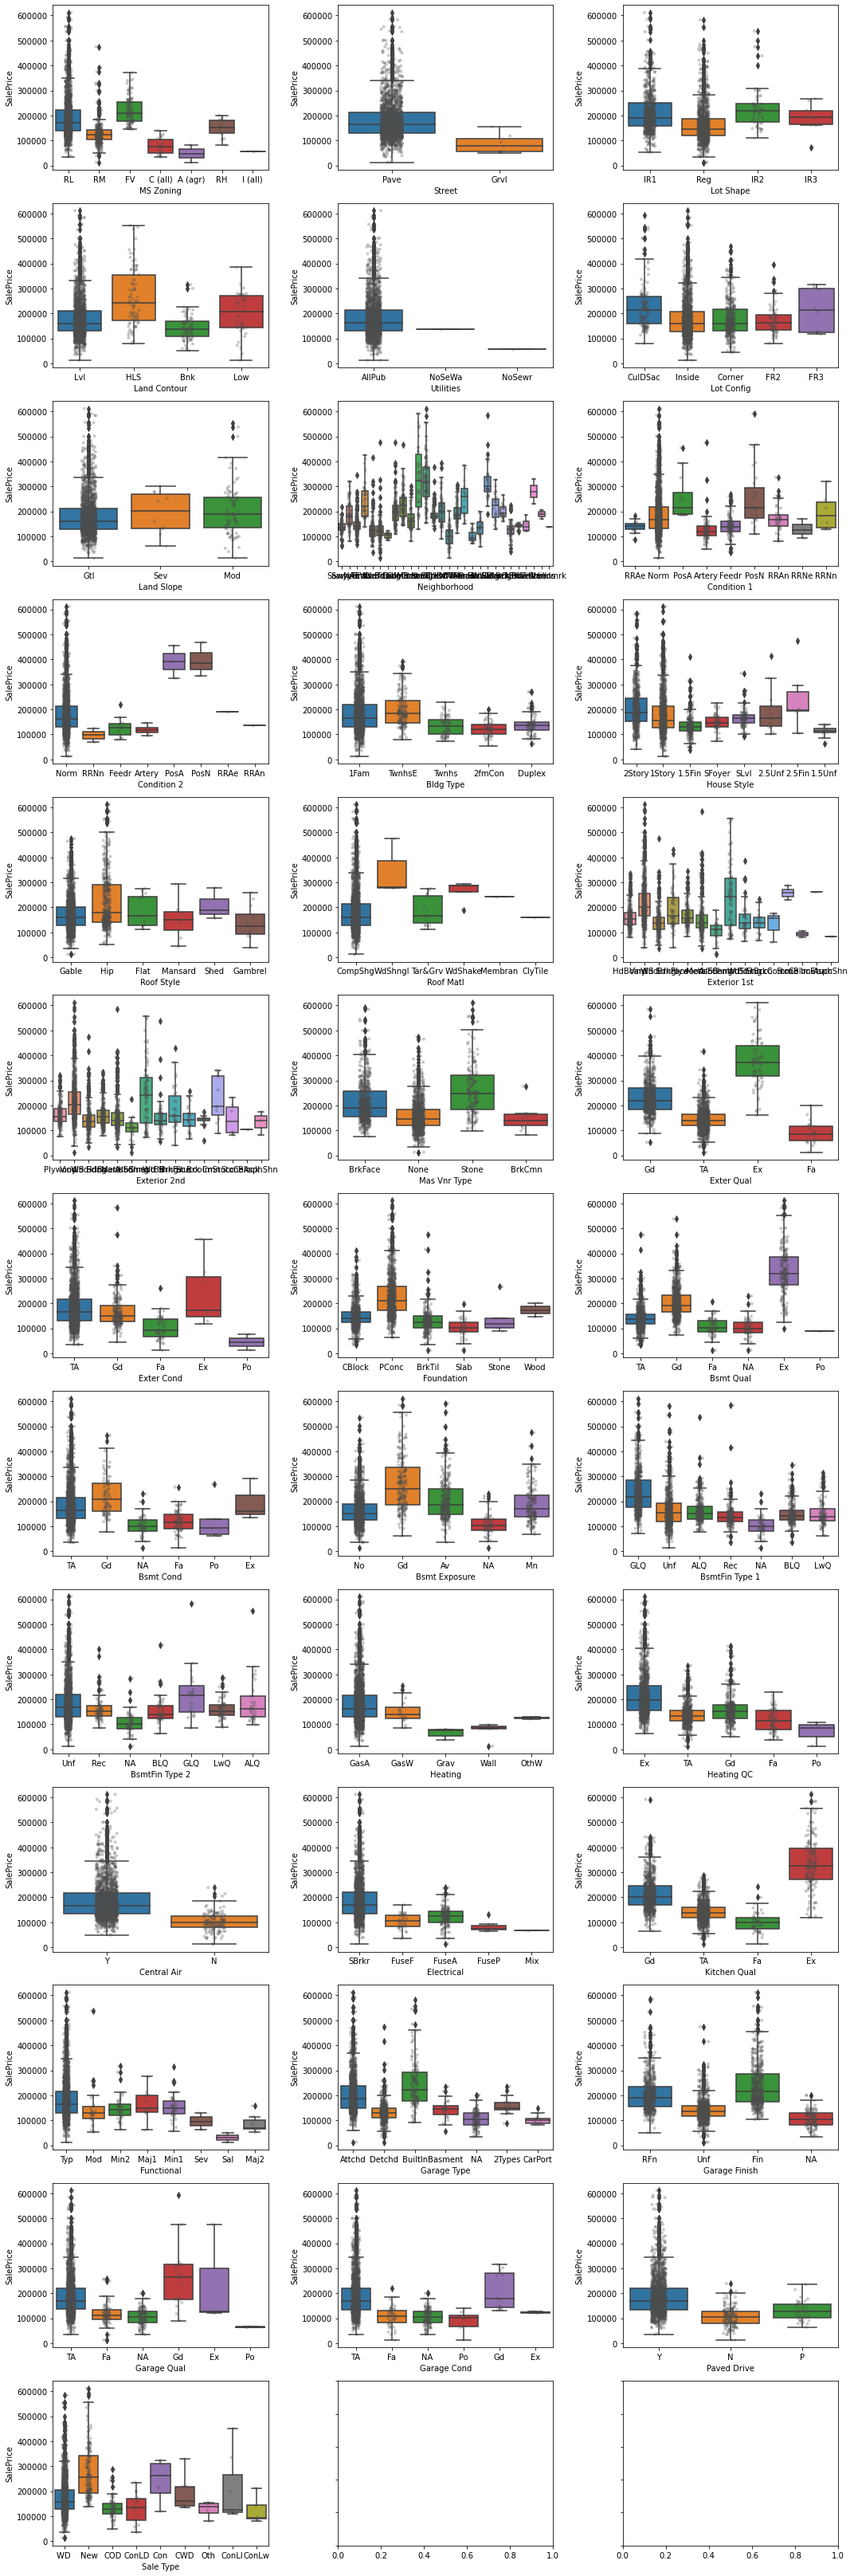

In [26]:
fig = plt.subplots(len(cat_col) // 3 + 1, 3, figsize=(15, 45), sharey=True)

#loop through every categorical columns
for i, col in enumerate(cat_col, 1):
    plt.subplot(len(cat_col) // 3 + 1, 3, i)
    sns.boxplot(x=col, y='SalePrice', data=train)
    sns.stripplot(x=col,
                  y='SalePrice',
                  data=train,
                  size=4,
                  color='.3',
                  linewidth=0,
                  alpha=0.3)

plt.tight_layout()

From the boxplot above, I'll exclude the following features from the model ...
1. 'Street', since most of them are paved
1. 'Lot Shape', since there is only little different between each lot shape
1. 'Utilities', most of our observation are in Allpub
1. 'Roof Style', since there is only little different between each style

and select only categorical feature that visibly distinguishable as follow ...

In [27]:
cat_col = [
    'MS Zoning', 'Street', 'Land Contour', 'Bldg Type', 'Mas Vnr Type',
    'Foundation', 'Heating', 'Central Air', 'Electrical', 'Paved Drive', 'Neighborhood'
]

## Features Engineering

### Age

In [28]:
# Was the house be rebuilt?
train['was_rebuilt'] = train['Year Remod/Add'] - train['Year Built']
train['was_rebuilt'] = train['was_rebuilt'].map(lambda x: 1 if x != 0 else 0)

In [29]:
# Age of the house
train['age_since_built'] = train['Yr Sold'] - train['Year Built']
train['age_since_renov'] = train['Yr Sold'] - train['Year Remod/Add']

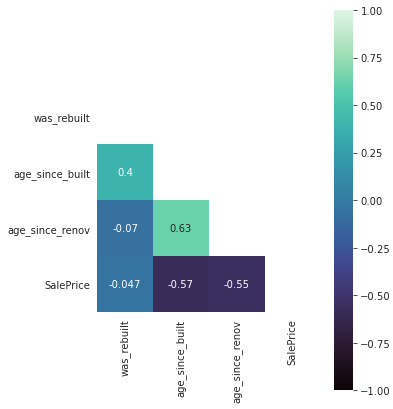

In [30]:
corr = train[[
    'was_rebuilt', 'age_since_built', 'age_since_renov', 'SalePrice'
]].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5, 7))
    ax = sns.heatmap(corr,
                     mask=mask,
                     vmax=1,
                     vmin=-1,
                     square=True,
                     cmap='mako',
                     annot=True)

Seems like our age features was somehow negatively correlated with SalePrice, I'll only keep 'age_since_built' since it has highest coefficient and there is collinearity between 'age_since_built' & 'age_since_renov'

In [31]:
num_col.append('age_since_built')
num_col.remove('Year Built')
num_col.remove('Year Remod/Add')

### Lot frontage ratio

In [32]:
train['frontage_ratio'] = train['lot_frontage_imputed'] / train['Lot Area']

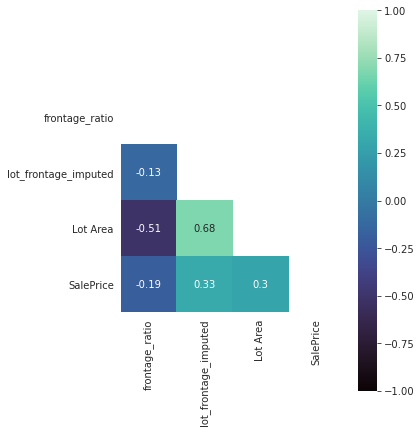

In [33]:
corr = train[[
    'frontage_ratio', 'lot_frontage_imputed', 'Lot Area', 'SalePrice'
]].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5, 7))
    ax = sns.heatmap(corr,
                     mask=mask,
                     vmax=1,
                     vmin=-1,
                     square=True,
                     cmap='mako',
                     annot=True)

Frontage ratio doesn't add any valuable information

### Total Area vs individual

In [34]:
train['Total_area'] = train['Total Bsmt SF'] + \
    train['1st Flr SF'] + train['2nd Flr SF']

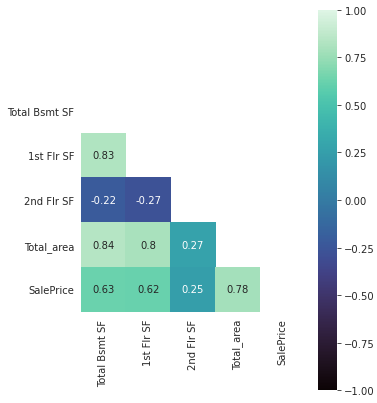

In [35]:
corr = train[[
    'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Total_area', 'SalePrice'
]].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5, 7))
    ax = sns.heatmap(corr,
                     mask=mask,
                     vmax=1,
                     vmin=-1,
                     square=True,
                     cmap='mako',
                     annot=True)

Total Area tends to have stronger predictive power than the individual floor area, I'll keep only Total_area and drop all individual floor area.

In [36]:
num_col.append('Total_area')
num_col.remove('Total Bsmt SF')
num_col.remove('1st Flr SF')

In [37]:
# Feature Engieering Function
def feat_eng(df):
    df['age_since_built'] = df['Yr Sold'] - df['Year Built']
    df['Total_area'] = df['Total Bsmt SF'] + \
        df['1st Flr SF'] + df['2nd Flr SF']
    return df

In [38]:
# list of categorical columns that can be converted to ordinal order
cat_to_num = [
    'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
    'Heating QC', 'Kitchen Qual', 'Garage Qual', 'Garage Cond'
]


def to_num(val):
    if val == 'Ex':
        return 5
    elif val == 'Gd':
        return 4
    elif val == 'TA' or val == 'Av':
        return 3
    elif val == 'Fa' or val == 'Mn':
        return 2
    elif val == 'Po' or val == 'No':
        return 1
    elif val == 'NA':
        return 0


for col in cat_to_num:
    train[col] = train[col].map(to_num)

num_col = num_col + cat_to_num
num_col = set(num_col)
cat_col = list(set(cat_col).difference(set(cat_to_num)))


def cat2num(df):
    for col in cat_to_num:
        df[col] = df[col].map(to_num)
    return df

In [41]:
best_num = np.abs(
    pd.concat(
        [train[num_col], train['SalePrice']],
        axis=1).corr()['SalePrice']).sort_values(ascending=False).index[1:]

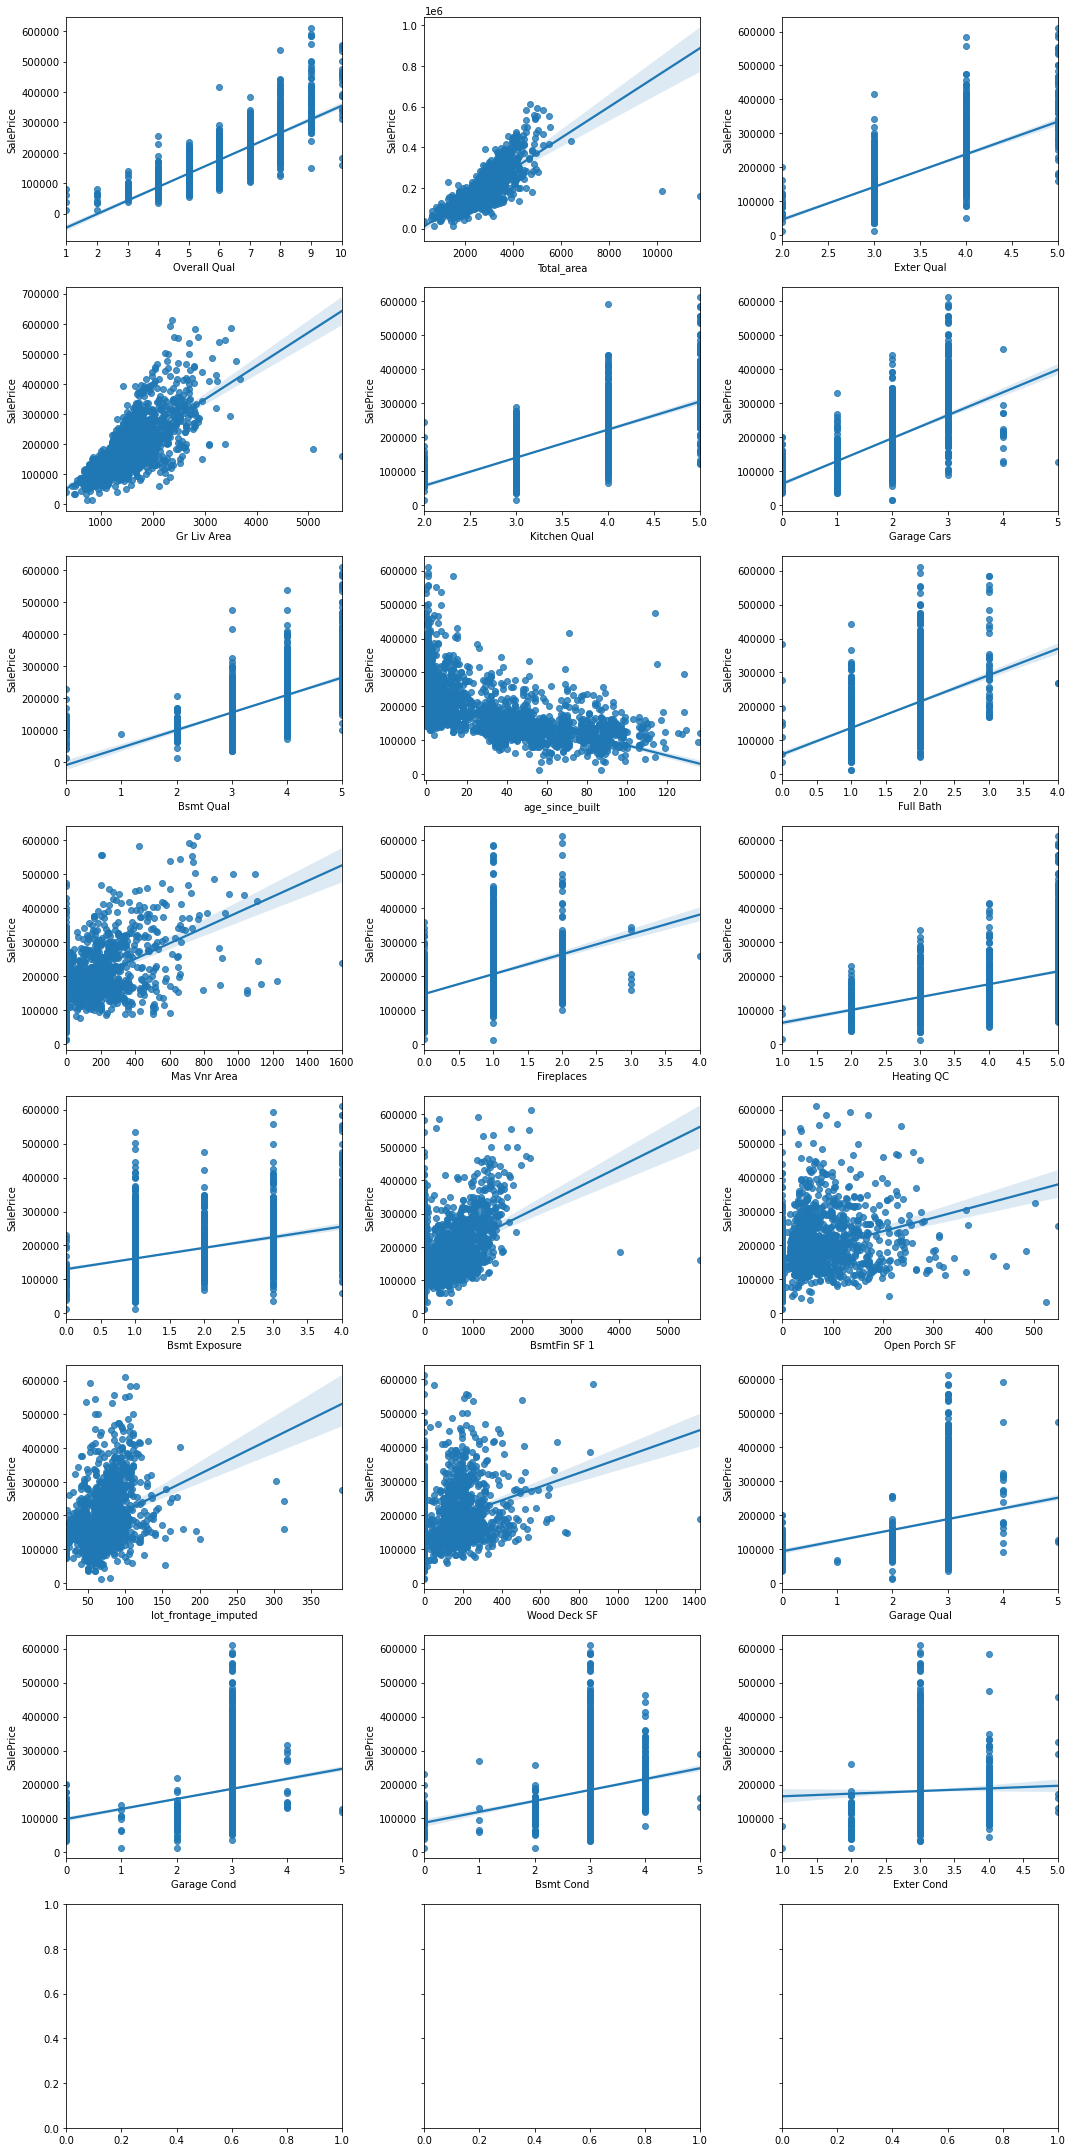

In [42]:
#Sort numerical attributed by correlation coefficient
best_num = np.abs(
    pd.concat(
        [train[num_col], train['SalePrice']],
        axis=1).corr()['SalePrice']).sort_values(ascending=False).index[1:]

#Initiate plot
fig = plt.subplots(len(num_col) // 3 + 1, 3, figsize=(15, 30), sharey=True)


#loop through every categorical columns
for i, col in enumerate(best_num, 1):
    plt.subplot(len(num_col) // 3 + 1, 3, i)
    sns.regplot(x=col, y='SalePrice', data=train)

plt.tight_layout()

As expected, some of the important features are factors that normally were in our common sense such as...
1. Overall and individual aspect of quality: Higher quality --> higher price
1. Total area: Higher total area --> higher price 
1. Property age: older property --> cheaper

## Preprocessing steps and the rest

I decided to put preprocessing, modelling and evaluation in separated notebook named individually for each model.